## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  76.268394   212.436497  0.120584  10.236741  0.413094
1   0.368710  1699.530590  0.323033   5.191321  1.724928
2  49.604813   794.237019  0.397351   4.693868  1.538102
3  84.953561  1475.173611  0.126655   4.959222  1.185002
4  88.013800  1032.213512  0.246628   6.094976  1.350821


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9458806	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9354597	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9268042	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9189977	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9091187	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9007713	total: 60.1ms	remaining: 9.95s
6:	learn: 0.8942869	total: 60.3ms	remaining: 8.56s
7:	learn: 0.8830178	total: 60.9ms	remaining: 7.55s
8:	learn: 0.8753483	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8675275	total: 61.7ms	remaining: 6.11s
10:	learn: 0.8583089	total: 62.1ms	remaining: 5.58s
11:	learn: 0.8504065	total: 62.6ms	remaining: 5.16s
12:	learn: 0.8401634	total: 63.1ms	remaining: 4.79s
13:	learn: 0.8342005	total: 63.4ms	remaining: 4.46s
14:	learn: 0.8241400	total: 63.7ms	remaining: 4.18s
15:	learn: 0.8167969	total: 64.3ms	remaining: 3.95s
16:	learn: 0.8096195	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8032636	total: 65.2ms	remaining: 3.56s
18:	learn: 0.7948317	total: 65.7ms	remaining

98:	learn: 0.3976085	total: 103ms	remaining: 934ms
99:	learn: 0.3948478	total: 103ms	remaining: 930ms
100:	learn: 0.3924481	total: 104ms	remaining: 923ms
101:	learn: 0.3896532	total: 104ms	remaining: 917ms
102:	learn: 0.3866220	total: 105ms	remaining: 911ms
103:	learn: 0.3839874	total: 105ms	remaining: 906ms
104:	learn: 0.3817333	total: 106ms	remaining: 900ms
105:	learn: 0.3786932	total: 106ms	remaining: 894ms
106:	learn: 0.3753763	total: 106ms	remaining: 888ms
107:	learn: 0.3730221	total: 107ms	remaining: 883ms
108:	learn: 0.3705481	total: 107ms	remaining: 878ms
109:	learn: 0.3676670	total: 108ms	remaining: 872ms
110:	learn: 0.3648724	total: 108ms	remaining: 867ms
111:	learn: 0.3620589	total: 109ms	remaining: 862ms
112:	learn: 0.3592758	total: 109ms	remaining: 855ms
113:	learn: 0.3566882	total: 109ms	remaining: 850ms
114:	learn: 0.3545148	total: 110ms	remaining: 844ms
115:	learn: 0.3523090	total: 110ms	remaining: 839ms
116:	learn: 0.3498164	total: 110ms	remaining: 833ms
117:	learn: 0.

278:	learn: 0.1641056	total: 186ms	remaining: 480ms
279:	learn: 0.1633187	total: 186ms	remaining: 479ms
280:	learn: 0.1629684	total: 187ms	remaining: 477ms
281:	learn: 0.1626253	total: 187ms	remaining: 476ms
282:	learn: 0.1617968	total: 187ms	remaining: 475ms
283:	learn: 0.1615622	total: 188ms	remaining: 474ms
284:	learn: 0.1605891	total: 188ms	remaining: 473ms
285:	learn: 0.1602608	total: 189ms	remaining: 472ms
286:	learn: 0.1595027	total: 189ms	remaining: 470ms
287:	learn: 0.1592804	total: 190ms	remaining: 469ms
288:	learn: 0.1587140	total: 190ms	remaining: 468ms
289:	learn: 0.1583766	total: 190ms	remaining: 466ms
290:	learn: 0.1580981	total: 191ms	remaining: 465ms
291:	learn: 0.1577836	total: 191ms	remaining: 464ms
292:	learn: 0.1573383	total: 192ms	remaining: 463ms
293:	learn: 0.1571434	total: 192ms	remaining: 461ms
294:	learn: 0.1564226	total: 193ms	remaining: 460ms
295:	learn: 0.1558683	total: 193ms	remaining: 459ms
296:	learn: 0.1555760	total: 194ms	remaining: 458ms
297:	learn: 

496:	learn: 0.0826895	total: 284ms	remaining: 287ms
497:	learn: 0.0825265	total: 284ms	remaining: 286ms
498:	learn: 0.0822776	total: 285ms	remaining: 286ms
499:	learn: 0.0820599	total: 285ms	remaining: 285ms
500:	learn: 0.0816953	total: 285ms	remaining: 284ms
501:	learn: 0.0814845	total: 286ms	remaining: 283ms
502:	learn: 0.0811720	total: 286ms	remaining: 283ms
503:	learn: 0.0810331	total: 287ms	remaining: 282ms
504:	learn: 0.0808461	total: 287ms	remaining: 281ms
505:	learn: 0.0807112	total: 287ms	remaining: 281ms
506:	learn: 0.0805286	total: 288ms	remaining: 280ms
507:	learn: 0.0803977	total: 288ms	remaining: 279ms
508:	learn: 0.0800990	total: 289ms	remaining: 279ms
509:	learn: 0.0799729	total: 289ms	remaining: 278ms
510:	learn: 0.0797959	total: 289ms	remaining: 277ms
511:	learn: 0.0795906	total: 290ms	remaining: 276ms
512:	learn: 0.0794178	total: 290ms	remaining: 276ms
513:	learn: 0.0792816	total: 291ms	remaining: 275ms
514:	learn: 0.0791599	total: 291ms	remaining: 274ms
515:	learn: 

699:	learn: 0.0531882	total: 367ms	remaining: 157ms
700:	learn: 0.0531478	total: 368ms	remaining: 157ms
701:	learn: 0.0530912	total: 368ms	remaining: 156ms
702:	learn: 0.0529869	total: 369ms	remaining: 156ms
703:	learn: 0.0529313	total: 369ms	remaining: 155ms
704:	learn: 0.0528718	total: 370ms	remaining: 155ms
705:	learn: 0.0527793	total: 370ms	remaining: 154ms
706:	learn: 0.0527206	total: 371ms	remaining: 154ms
707:	learn: 0.0526654	total: 371ms	remaining: 153ms
708:	learn: 0.0526110	total: 372ms	remaining: 153ms
709:	learn: 0.0525559	total: 372ms	remaining: 152ms
710:	learn: 0.0524060	total: 373ms	remaining: 151ms
711:	learn: 0.0523158	total: 373ms	remaining: 151ms
712:	learn: 0.0522621	total: 374ms	remaining: 150ms
713:	learn: 0.0522091	total: 374ms	remaining: 150ms
714:	learn: 0.0521547	total: 374ms	remaining: 149ms
715:	learn: 0.0520993	total: 375ms	remaining: 149ms
716:	learn: 0.0520475	total: 375ms	remaining: 148ms
717:	learn: 0.0519465	total: 376ms	remaining: 148ms
718:	learn: 

919:	learn: 0.0347678	total: 465ms	remaining: 40.4ms
920:	learn: 0.0347151	total: 466ms	remaining: 39.9ms
921:	learn: 0.0345650	total: 466ms	remaining: 39.4ms
922:	learn: 0.0345132	total: 466ms	remaining: 38.9ms
923:	learn: 0.0344621	total: 467ms	remaining: 38.4ms
924:	learn: 0.0343160	total: 467ms	remaining: 37.9ms
925:	learn: 0.0342658	total: 468ms	remaining: 37.4ms
926:	learn: 0.0342162	total: 468ms	remaining: 36.9ms
927:	learn: 0.0340739	total: 468ms	remaining: 36.3ms
928:	learn: 0.0340253	total: 469ms	remaining: 35.8ms
929:	learn: 0.0339772	total: 469ms	remaining: 35.3ms
930:	learn: 0.0338421	total: 470ms	remaining: 34.8ms
931:	learn: 0.0337948	total: 470ms	remaining: 34.3ms
932:	learn: 0.0337480	total: 470ms	remaining: 33.8ms
933:	learn: 0.0337183	total: 471ms	remaining: 33.3ms
934:	learn: 0.0336888	total: 471ms	remaining: 32.8ms
935:	learn: 0.0336375	total: 472ms	remaining: 32.3ms
936:	learn: 0.0336084	total: 472ms	remaining: 31.8ms
937:	learn: 0.0335796	total: 473ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

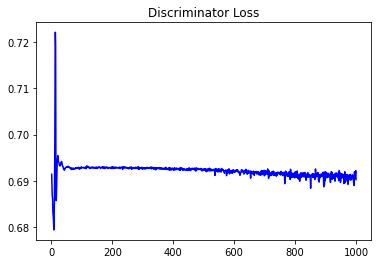

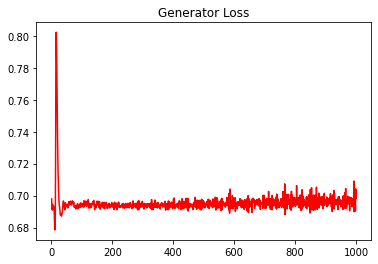

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14646247722278505


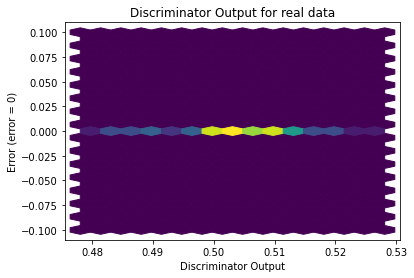

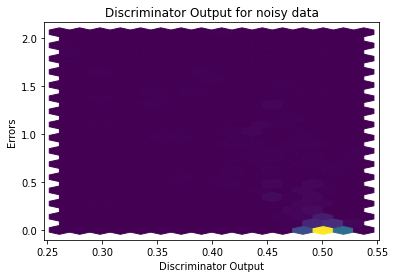

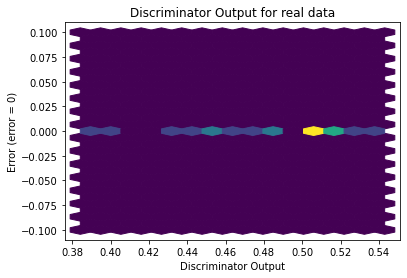

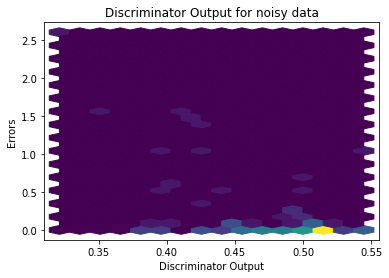

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


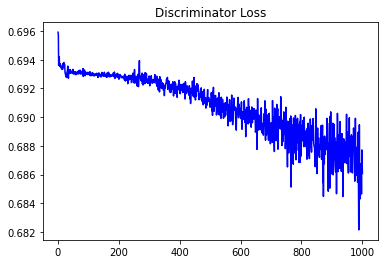

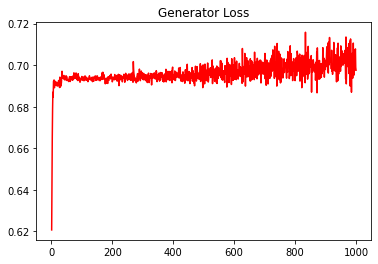

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17825720875725734


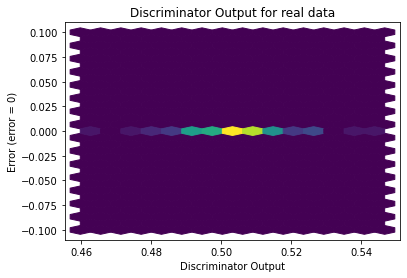

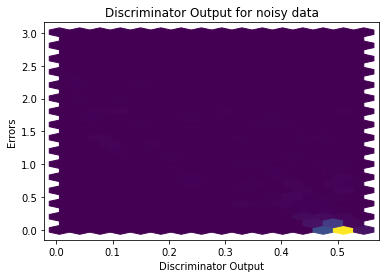

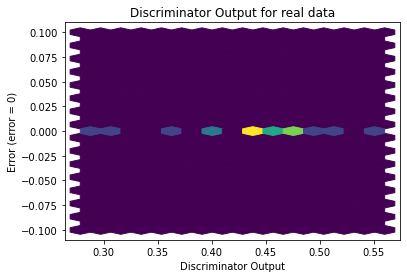

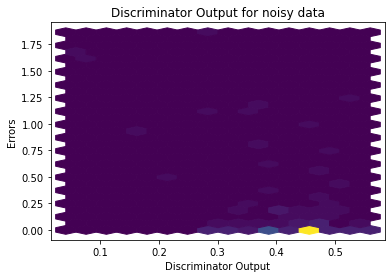

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1057]], requires_grad=True)
